<a href="https://colab.research.google.com/github/kaashcro/MAT421-ComputationalMethods/blob/main/Homework_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Numerical Error and Instability

There are errors in certian equations that can grow worse with time

In [1]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
%matplotlib inline

#defining the parameters to be worked on, frequency, and numerical grid
h = 0.1
t = np.arange(0, 5.1, h)
w = 4
s0 = np.array([[1], [0]])


#Defining the steps size approximation modifications in this instance
m_e = np.array([[1, h],
               [-w**2*h, 1]])
m_i = inv(np.array([[1, -h],
               [w**2*h, 1]]))
m_t = np.dot(inv(np.array([[1, -h/2],
    [w**2*h/2,1]])), np.array(
      [[1,h/2], [-w**2*h/2, 1]]))

s_e = np.zeros((len(t), 2))
s_i = np.zeros((len(t), 2))
s_t = np.zeros((len(t), 2))

#We now integrate and construct a for loop for appropriate measures
s_e[0, :] = s0.T
s_i[0, :] = s0.T
s_t[0, :] = s0.T

for j in range(0, len(t)-1):
    s_e[j+1, :] = np.dot(m_e,s_e[j, :])
    s_i[j+1, :] = np.dot(m_i,s_i[j, :])
    s_t[j+1, :] = np.dot(m_t,s_t[j, :])

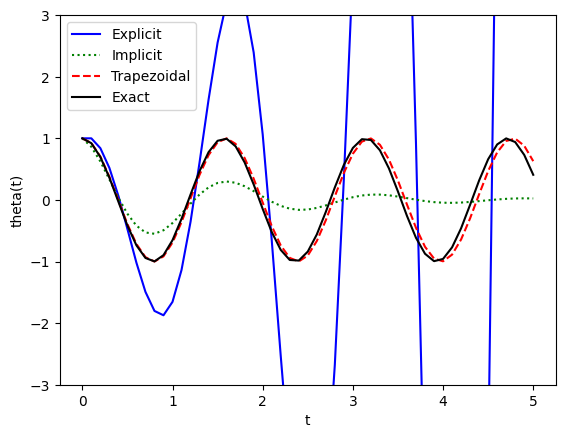

In [3]:
plt.plot(t,s_e[:,0],'b-')
plt.plot(t,s_i[:,0],'g:')
plt.plot(t,s_t[:,0],'r--')
plt.plot(t, np.cos(w*t), 'k')
plt.ylim([-3, 3])
plt.xlabel('t')
plt.ylabel('theta(t)')
plt.legend(['Explicit', 'Implicit', \
            'Trapezoidal', 'Exact'])

Predictor-Corrector Methods

This method avoids the pitfalls of the other methods by preforming the forward step several times and then integrate the equation.

<ipython-input-3-b89f2867c7fa>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


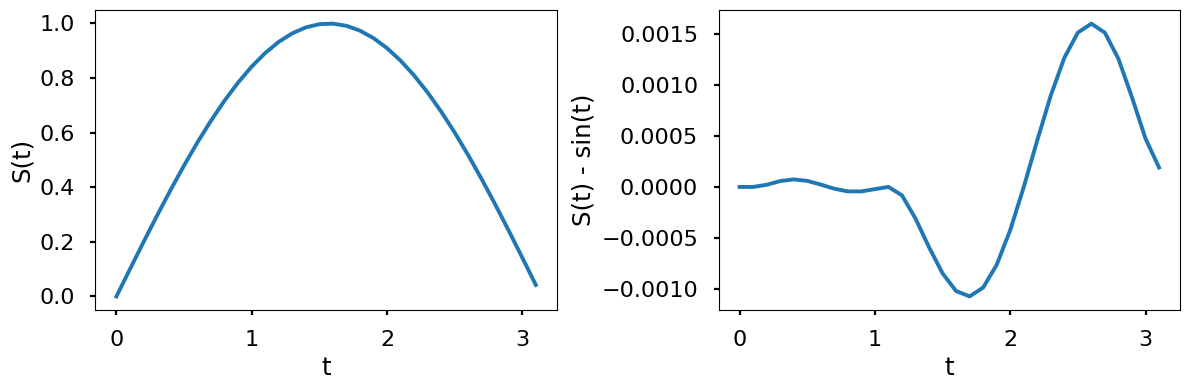

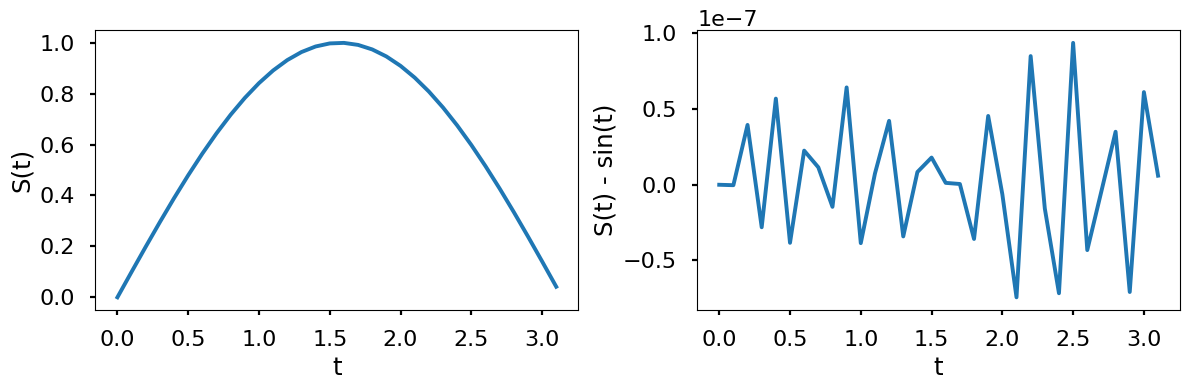

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp
plt.style.use('seaborn-poster')
%matplotlib inline
F = lambda t, s: np.cos(t)
t_eval = np.arange(0, np.pi, 0.1)
sol = solve_ivp(F, [0, np.pi], [0], t_eval=t_eval)
plt.figure(figsize = (12, 4))
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('S(t)')
plt.subplot(122)
plt.plot(sol.t, sol.y[0] - np.sin(sol.t))
plt.xlabel('t')
plt.ylabel('S(t) - sin(t)')
plt.tight_layout()
plt.show()
sol = solve_ivp(F, [0, np.pi], [0], t_eval=t_eval, \
rtol = 1e-8, atol = 1e-8)
plt.figure(figsize = (12, 4))
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('S(t)')
plt.subplot(122)
plt.plot(sol.t, sol.y[0] - np.sin(sol.t))
plt.xlabel('t')
plt.ylabel('S(t) - sin(t)')
plt.tight_layout()
plt.show()

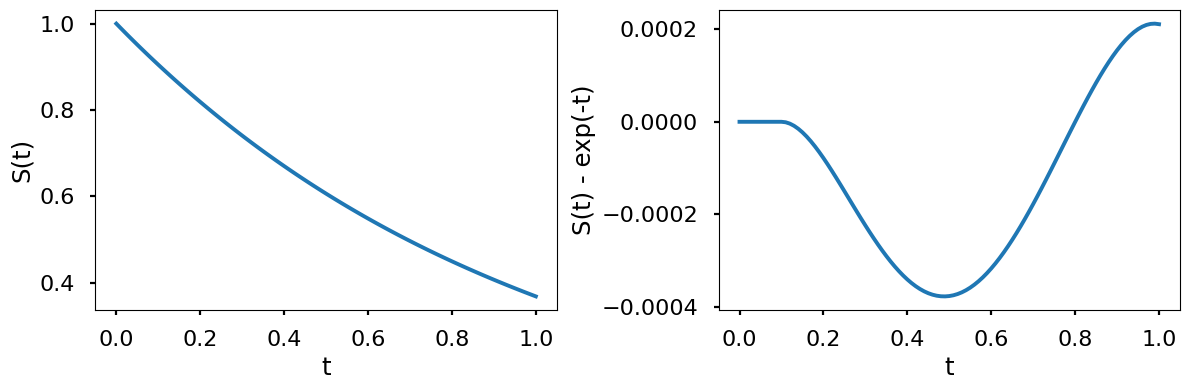

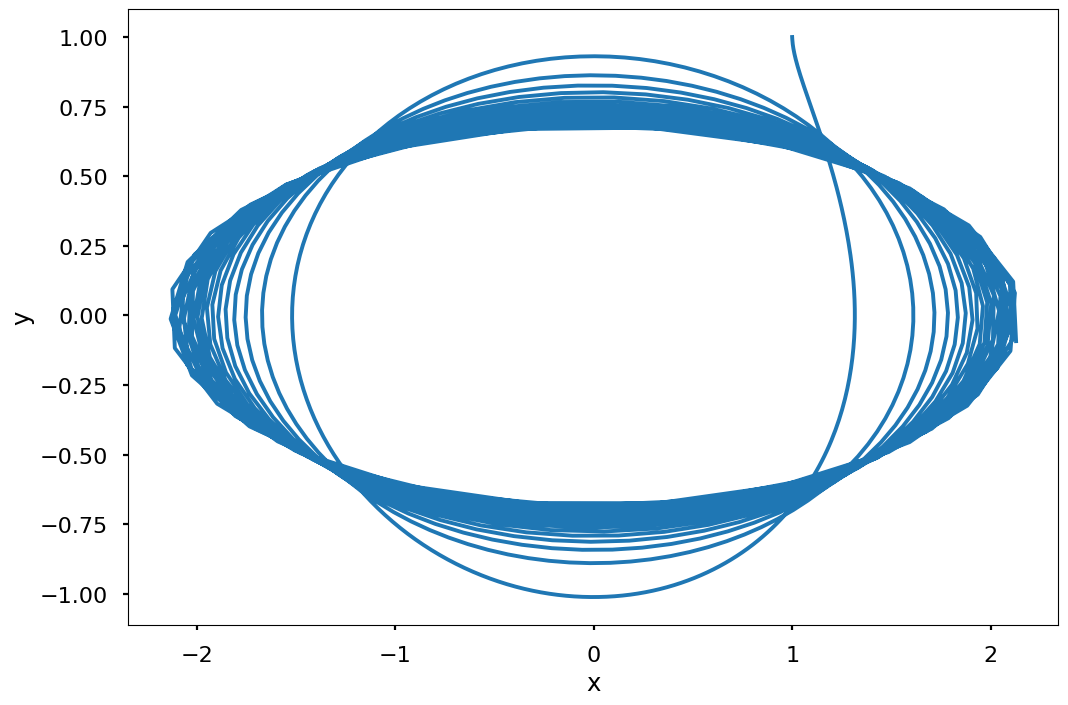

In [4]:
F = lambda t, s: -s
t_eval = np.arange(0, 1.01, 0.01)
sol = solve_ivp(F, [0, 1], [1], t_eval=t_eval)
plt.figure(figsize = (12, 4))
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('S(t)')
plt.subplot(122)
plt.plot(sol.t, sol.y[0] - np.exp(-sol.t))
plt.xlabel('t')
plt.ylabel('S(t) - exp(-t)')
plt.tight_layout()
plt.show()
F = lambda t, s: np.dot(np.array([[0, t**2], [-t, 0]]), s)
t_eval = np.arange(0, 10.01, 0.01)
sol = solve_ivp(F, [0, 10], [1, 1], t_eval=t_eval)
plt.figure(figsize = (12, 8))
plt.plot(sol.y.T[:, 0], sol.y.T[:, 1])
plt.xlabel('x')
plt.ylabel('y')
plt.show()